### Assignment 1 ###

Perform a basic statistical analysis of the time DOT 311 (table is called dot_311) complaints are open (subtract closed date from created date)
Connect to the database to get the data and do the analysis. Submit the code through Github and type up your results in your PR

Host: training.c1erymiua9dx.us-east-1.rds.amazonaws.com
Port: 5432
Database: training
Username: dot_student
Password: qgis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import pg8000
from pandas import DataFrame


In [7]:
conn = pg8000.connect(host="training.c1erymiua9dx.us-east-1.rds.amazonaws.com", user='dot_student', password='qgis', database='training')
cursor = conn.cursor()

In [8]:
cursor.execute("select column_name from information_schema.columns where table_name='dot_311'")
column_list = []
for row in cursor.fetchall():
    column_list.append(row[0])
column_list

['gid',
 'unique_key',
 'agency',
 'agency nam',
 'complaint',
 'descriptor',
 'location t',
 'incident z',
 'incident a',
 'street nam',
 'cross stre',
 'cross st_1',
 'intersecti',
 'intersec_1',
 'address ty',
 'city',
 'landmark',
 'facility t',
 'status',
 'due date',
 'resolution',
 'resoluti_1',
 'community',
 'borough',
 'x coordina',
 'y coordina',
 'park facil',
 'park borou',
 'school nam',
 'school num',
 'school reg',
 'school cod',
 'school pho',
 'school add',
 'school cit',
 'school sta',
 'school zip',
 'school not',
 'school or',
 'vehicle ty',
 'taxi compa',
 'taxi pick',
 'bridge hig',
 'bridge h_1',
 'road ramp',
 'bridge h_2',
 'garage lot',
 'ferry dire',
 'ferry term',
 'latitude',
 'longitude',
 'location',
 'geom',
 'created_date',
 'closed_date']

In [9]:
response = "select * from dot_311"

In [10]:
cursor.execute("select * from dot_311")
output = []
for row in cursor.fetchall():
    output.append(row)


In [11]:
df = pd.DataFrame(data=output, columns=column_list)

In [12]:
df.head(3)

,gid,unique_key,agency,agency nam,complaint,descriptor,location t,incident z,incident a,street nam,...,bridge h_2,garage lot,ferry dire,ferry term,latitude,longitude,location,geom,created_date,closed_date
0,2,32570549,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10301,None,None,...,None,None,None,None,40.613803753157917,-74.113373738864198,"(40.61380375315792, -74.1133737388642)",0101000020E61000006829ED83418752C0D7FC121F914E...,2016-02-01 00:12:00,2016-02-01 01:15:00
1,3,32572958,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10301,None,None,...,None,None,None,None,40.626545297464929,-74.091582334480577,"(40.62654529746493, -74.09158233448058)",0101000020E610000011DF267CDC8552C08809E5A23250...,2016-02-01 00:14:00,2016-02-01 00:54:00
2,4,32573576,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10310,None,None,...,None,None,None,None,40.629249554787492,-74.123220752604595,"(40.62924955478749, -74.1232207526046)",0101000020E610000004A84BD9E28752C0DC6AD93F8B50...,2016-02-01 00:15:00,2016-02-01 01:30:00


In [13]:
sel_df = df[[
 'unique_key',
 'agency',
 'agency nam',
 'created_date',
 'closed_date',                  
 'complaint',
 'descriptor',
 'status',
 'due date',
 'resolution',
 'city',
 'borough'
 ]]

In [14]:
sel_df.head(3)

,unique_key,agency,agency nam,created_date,closed_date,complaint,descriptor,status,due date,resolution,city,borough
0,32570549,DOT,Department of Transportation,2016-02-01 00:12:00,2016-02-01 01:15:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND
1,32572958,DOT,Department of Transportation,2016-02-01 00:14:00,2016-02-01 00:54:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND
2,32573576,DOT,Department of Transportation,2016-02-01 00:15:00,2016-02-01 01:30:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND


In [15]:
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 12 columns):
unique_key      5851 non-null object
agency          5851 non-null object
agency nam      5851 non-null object
created_date    5851 non-null datetime64[ns]
closed_date     5650 non-null datetime64[ns]
complaint       5851 non-null object
descriptor      5851 non-null object
status          5851 non-null object
due date        1464 non-null object
resolution      1657 non-null object
city            4405 non-null object
borough         5851 non-null object
dtypes: datetime64[ns](2), object(10)
memory usage: 320.0+ KB


In [16]:
df['Created Date'] = pd.to_datetime(df['created_date'], format='%m%d%y %H:%M:%S')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 56 columns):
gid             5851 non-null int64
unique_key      5851 non-null object
agency          5851 non-null object
agency nam      5851 non-null object
complaint       5851 non-null object
descriptor      5851 non-null object
location t      1604 non-null object
incident z      4400 non-null object
incident a      2555 non-null object
street nam      2555 non-null object
cross stre      2617 non-null object
cross st_1      2387 non-null object
intersecti      3370 non-null object
intersec_1      3359 non-null object
address ty      5604 non-null object
city            4405 non-null object
landmark        0 non-null object
facility t      5851 non-null object
status          5851 non-null object
due date        1464 non-null object
resolution      1657 non-null object
resoluti_1      5810 non-null object
community       5851 non-null object
borough         5851 non-null object
x coordin

In [11]:
dateutil.parser.parse("2016-02-01 00:15:00")

datetime.datetime(2016, 2, 1, 0, 15)

In [12]:
#no need to do this step as created date and closed date are already in datetime format
#sel_df['CreatedDate'] = pd.to_datetime(sel_df['created_date'], format='%m/%d/%y %H:%M:%S')
#sel_df.info()

In [13]:
#def parse_date(str_date):
    #return dateutil.parser.parse(str_date)

#df['Created Date'] = df['created_date'].apply(parse_date)

In [14]:
sel_df['delay'] = sel_df['closed_date'] - sel_df['created_date']
sel_df['delay'].head(3)

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0   01:03:00
1   00:40:00
2   01:15:00
Name: delay, dtype: timedelta64[ns]

In [15]:
#testing withou ta dataframe
delay = df['closed_date'] - df['created_date']
delay
delay.isnull().value_counts()
delay.describe()

count                       5650
mean      6 days 15:05:05.589380
std      14 days 12:05:38.260805
min           -19 days +09:29:00
25%              0 days 01:14:00
50%              0 days 21:48:15
75%       4 days 00:30:48.500000
max             89 days 18:54:00
dtype: object

In [16]:
delay.isnull().value_counts()

False    5650
True      201
dtype: int64

In [17]:
delay_delta = pd.DataFrame(sel_df['delay'][sel_df['delay']> pd.Timedelta(seconds=0)].dropna())
delay_delta.describe()

,delay
count,4547
mean,8 days 16:15:03.514405
std,15 days 10:48:08.619990
min,0 days 00:00:01
25%,0 days 12:41:58
50%,1 days 03:33:17
75%,6 days 00:30:23.500000
max,89 days 18:54:00


In [18]:
#now all the null values have been removed. great ! now i can test with a dataframe.
delay_delta['delay'].isnull().value_counts()

False    4547
Name: delay, dtype: int64

In [24]:
delay_delta['delay'].head()

0   01:03:00
1   00:40:00
2   01:15:00
3   02:18:00
4   00:41:00
Name: delay, dtype: timedelta64[ns]

In [19]:
# Now checking the original dataframe sel_df. it has 201 null values which i have to remove.
sel_df['delay'].isnull().value_counts()

False    5650
True      201
Name: delay, dtype: int64

In [20]:
sel_df['delay'] = pd.DataFrame(sel_df['delay'][sel_df['delay']> pd.Timedelta(seconds=0)].dropna())
sel_df['delay'].describe()

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count                       4547
mean      8 days 16:15:03.514405
std      15 days 10:48:08.619990
min              0 days 00:00:01
25%              0 days 12:41:58
50%              1 days 03:33:17
75%       6 days 00:30:23.500000
max             89 days 18:54:00
Name: delay, dtype: object

In [21]:
sel_df['delay'].isnull().value_counts()

False    4547
True     1304
Name: delay, dtype: int64

In [23]:
sel_df.head(3)

,unique_key,agency,agency nam,created_date,closed_date,complaint,descriptor,status,due date,resolution,city,borough,delay
0,32570549,DOT,Department of Transportation,2016-02-01 00:12:00,2016-02-01 01:15:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND,01:03:00
1,32572958,DOT,Department of Transportation,2016-02-01 00:14:00,2016-02-01 00:54:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND,00:40:00
2,32573576,DOT,Department of Transportation,2016-02-01 00:15:00,2016-02-01 01:30:00,Traffic Signal Condition,Controller,Closed,None,None,STATEN ISLAND,STATEN ISLAND,01:15:00


In [27]:
delay_delta['delay'].value_counts()

0 days 00:20:00     23
0 days 01:32:00     10
0 days 01:26:00     10
0 days 02:02:00      9
0 days 00:25:00      9
0 days 01:34:00      9
0 days 01:27:00      9
0 days 00:40:00      9
0 days 00:54:00      8
0 days 01:09:00      8
0 days 01:15:00      8
0 days 00:45:00      8
0 days 00:15:00      8
0 days 01:42:00      8
0 days 02:03:00      7
0 days 16:07:00      7
0 days 01:33:00      7
0 days 01:36:00      7
0 days 00:49:00      7
0 days 02:00:00      7
0 days 01:39:00      7
0 days 01:56:00      7
0 days 02:18:00      7
0 days 01:58:00      7
0 days 01:51:00      7
0 days 01:40:00      7
0 days 01:52:00      7
0 days 01:29:00      7
0 days 01:22:00      7
0 days 01:18:00      7
                    ..
1 days 23:05:16      1
0 days 22:39:36      1
10 days 16:07:27     1
0 days 23:53:09      1
0 days 03:14:00      1
0 days 04:56:26      1
3 days 16:46:05      1
43 days 18:11:57     1
1 days 06:05:30      1
1 days 02:06:00      1
43 days 15:03:49     1
1 days 18:18:00      1
2 days 18:0

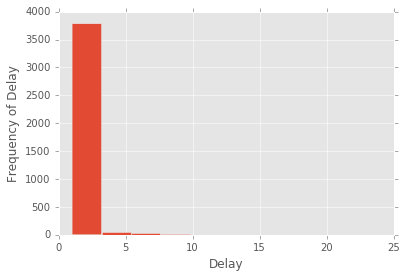

In [32]:

delay_delta['delay'].value_counts().hist()
plt.xlabel('Delay')
plt.ylabel('Frequency of Delay')

In [36]:
delay_plot = pd.DataFrame(delay_delta['delay'].value_counts())

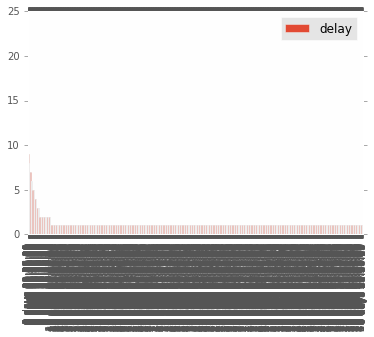

In [41]:
delay_plot.plot(kind='bar',x=delay_plot.index, y ='delay')

In [43]:
delay_plot.quantile(q=0.25)

delay    1.0
dtype: float64

In [44]:
delay_plot.quantile(q=0.5)

delay    1.0
dtype: float64

In [45]:
delay_plot.quantile(q=0.75)

delay    1.0
dtype: float64